# Template for Plot 

# What
This notebook is intended to be a sort of gallery of plot code that you can use to find the type of plot you would like to make and then copy and paste from here to make some plot code your own.  This notebook was written as an adjunct to the wiki:  https://sagemathnotes.miraheze.org/wiki/Main_Page SageMath for Undergraduates 



# Brief TOC for this Notebook 

* plot()  --> great for sage like things including expressions 
* parametric_plot --> for parametric equations where 2 functions  depend upon a third variable the parameter which does not appear directly in the plot.
* polar_plot --> plot a radius against an angle in polar coordinates
* Contour plot --> shows level lines of a function may be shaded and or colored.
* implicit_plot( 
* plot_vector_field
* plot_slope_field
* list_plot()   --> good plot when you have data points in hand 
* scatter_plots --> good for points, any order any place, not connected 
* shapes --> lines, points, ....


## Still Need
*log plots
*special scale effects
*interactive

*someplace else
*pie charts

## Links
*'''[https://sagemathnotes.miraheze.org/wiki/Plot_-_More_Info#Links Plot - More Info - SageMath for Undergraduates ]'''

*'''[https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html#sage.plot.plot.list_plot 2D Plotting — Sage 9.2 Reference Manual: 2D Graphics ]'''

### Version 2021 03 04 tested with SageMath 9.2 kernel

Plotting seems to be one of the more significant areas where SageMath is not Python [[tbd]]

Normally there are three steps in making a plot
* aquire the data
* make the plot
* save or show the plot

in many cases steps can be combined, but that may make for obscure code.  Here we will generally not do that and will show calls
with many optional arguments so you can see what they are.  Normally the plot is put in a variable like a_plot.... 
because that allows further manipulation like the combining of plots.

In the plots here I sometimes let optional arguments default, other times us them.  This is to help you to see when you might want to use the optional arguments and when you might want to skip them.


The next few cells contain functions that are not plotting but which may be useful in making plots
run them so the other cells in the notebook work, the notebook expects to be run top to bottom
but you can skip over any ploting cells to go directly to the example that interests you.

In [2]:
# define a usefull little function to get info about an object
# with optional print
# you may find this function useful in other of your coding.
# this function from the notebook  [[tbd]]
def info_about( a_comment, a_object, print_it = True ):
    """
    gets info about a_object
    a_commet is placed first -- see code
    if print_it is true, prints result
    """
    ret       = f"info_about: {a_comment}" 
    a_type    = type( a_object )    
    ret       = f"{ret}\n    type ->    {a_type}" 
    a_str     = str( a_object )
    ret       = f"{ret}\n    str() ->   {a_str}" 
    a_repr    = repr( a_object )
    ret       = f"{ret}\n    repr() ->  {a_repr}"     
    a_size    = sys.getsizeof( a_object )
    ret       = f"{ret}\n    size ->    {a_size}"      
    a_id      = id( a_object )
    ret       = f"{ret}\n    id ->      {a_id}"  
    
    if print_it:
        print( ret )
    
    

In [3]:
# demo of above 
info_about( "plot", plot )
info_about( "example tuple", ( 2, "two") )

info_about: plot
    type ->    <class 'function'>
    str() ->   <function plot at 0x6ffbfffad8c0>
    repr() ->  <function plot at 0x6ffbfffad8c0>
    size ->    144
    id ->      123128122104000
info_about: example tuple
    type ->    <class 'tuple'>
    str() ->   (2, 'two')
    repr() ->  (2, 'two')
    size ->    72
    id ->      123128097168592


In [4]:
# this is a function to get data just to have something
# to graph
# the point is to have a list of tuples where each tuple is an x, y point to graph 
# the data is available in other formats, one is as a list of lists, one for the x values one
# for the y values, this is a format matplot lib likes.


# plots of 2 lists
# a functions domain and range
# for the function use sin( x )
# use a for loop -- not the "rigtht" way to build the lists, but simple
# code has more steps than necessary to make logic clear
# do not use as a model of a good way to build this sort of thing
# we just need some data to plot
import math  

def make_sin_data( format = "tuple"): 
    """
    """
    sin           = math.sin
    sin_domain   = []
    sin_range    = []
    sin_points   = []     # values as xy tuples 
    no_in_domain  = 600
    delta_theta   = .01

    for ix in range( no_in_domain ):
        domain_value  = ix * delta_theta
        range_value   = sin( domain_value )
        sin_domain.append( domain_value )
        sin_range.append( range_value )
        sin_points.append(( domain_value, range_value ))
    if format == "tuple":
        print( "returning data as a list of tuples" )
        return sin_points
    else:
        print( "returning data as a 2 seperate lists" )
        return [ sin_domain, sin_range ]

# Just Plot --> plot()

Plot in the form of plot "understands" math pretty well and will graph things that act like functions
pretty well, it figures out a lot of stuff on its own.  Here we will make symbolic expressions of 
the variable x and plot does it magic

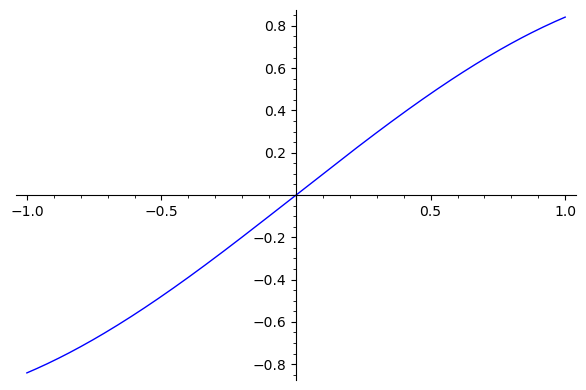

In [5]:
a_exp  = sin( x )
a_plot =  plot( a_exp, x )
show( a_plot )

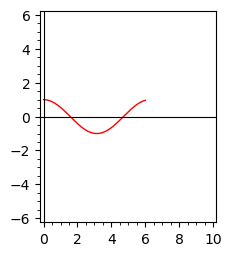

In [6]:
# the above is a bit two brief for control, we will add a bit including the name of the variable to be graphed
# the values of these options may not have been well choosen for a nice graph, they 
# are here to show you the kind of control you can get.
var( "theta" )
a_exp     = cos ( theta )
a_plot    =  plot( a_exp, 
                   xmin          = 0, 
                   xmax          = 6,
                   color         = "red",
                   
                 )

# comment out the options you want to run on automatic 
show( a_plot,
     aspect_ratio  = 1,        # works, but may distort or un destort the graph 
     axes          = true,     # show the axes
     frame         = True,     # a box around the graph
     gridlines     = False,    # make it look like graph paper - a grid of lines 
     figsize       = 4,        # bigger the number bigger the plot 4 is fairly small for a notebook 
     xmin          = -0,       # minimum value of x on the graph ( data may go off the graph )
     xmax          = 10,       # maximum value of x on the graph ( data may go off the graph )
     ymin          = -6,       # minimum value of y on the graph ( data may go off the graph )   
     ymax          = 6         # maximum value of y on the graph ( data may go off the graph )
     )
    
    
    
    
 

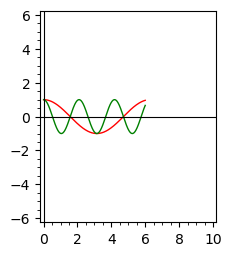

In [7]:
# plots can be added 
var( "theta" )
a_exp     = cos ( theta )
a_plot    =  plot( a_exp, 
                   xmin          = 0, 
                   xmax          = 6,
                   color         = "red",
                 )
b_exp     = cos ( 3* theta )
b_plot    =  plot( b_exp, 
                   xmin          = 0, 
                   xmax          = 6,
                   color         = "green",
                 )



# comment out the options you want to run on automatic 
show( a_plot + b_plot,
     aspect_ratio  = 1,        # works, but may distort or un destort the graph 
     axes          = true,      # show the axes
     frame         = True,     # a box around the graph
     gridlines     = false, 
     figsize       = 4,        # bigger the number bigger the plot 4 is fairly small for a notebook 
     xmin          = -0, 
     xmax          = 10,  
     ymin          = -6,        # consider the value in plot as well 
     ymax          = 6
     )

In [8]:
# plotting a Python function defined with def.

Parametric Plot


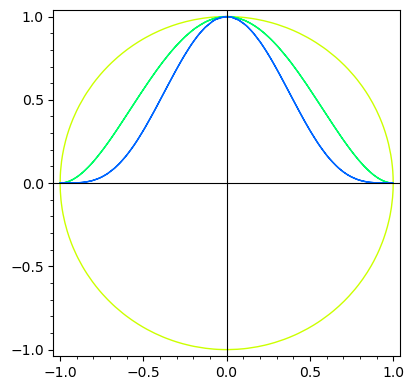

In [9]:
print( "Parametric Plot" )
# for graphing parametric equations ( 2 functions with a common variable implying a relation between the 2 functions )
# here we do 3 plots in one using the parameter t

var( "t" )  # our parameter 

ll  = -1. * pi    # lower limit of graph
ul  =  1. * pi    # upper limit of graph

# parametric_plot( x axis function, y axis function ) , ( parametric variable, min value, max value ), other plot args )

p1 = parametric_plot((cos(t),sin(t)),   (t, ll, ul),    rgbcolor=hue(0.2))
p2 = parametric_plot((cos(t),sin(t)^4), (t, ll,ul),     rgbcolor=hue(0.4))
p3 = parametric_plot((cos(t),sin(t)^8), (t, ll, ul),    rgbcolor=hue(0.6))

show( p1 + p2 + p3,
      axes           = True,       # True show the axes
      aspect_ratio   = 1,        # works, but may distort or un destort the graph 
      
      frame          = True,     # a box around the graph
     )

Implicit plot ( here function of x, y not solved for y )


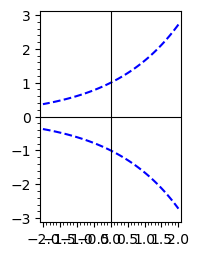

In [10]:
 print( "Implicit plot ( here function of x, y not solved for y )" )

var ('x y')
imp  = exp(x) == y^2
implicit_plot(imp, (x,-2,2), (y,-3,3), linestyle="--", figsize=4, axes="true", aspect_ratio=1)



Polar Plot


-2*sin(2*theta) + 1

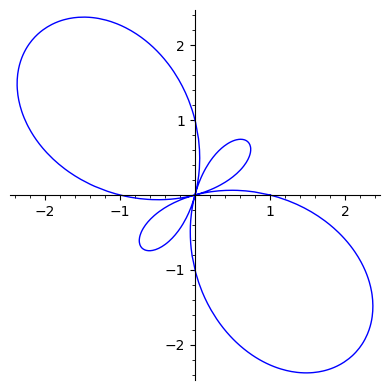

In [11]:
print( "Polar Plot" )

# Plot using polar coordinates
# note that many of the options for plot() also work here.

var( "theta" )

f =  1-2*sin(2*theta); show( f )

pp = polar_plot( f, theta, 0, 2*pi )
show( pp )

Contour plot


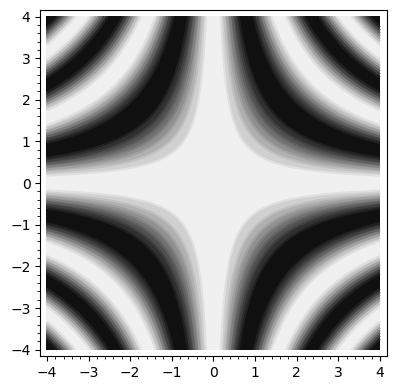

In [12]:
print( "Contour plot" )

# I do not get this but here is an example

f = lambda x,y: cos(x*y)
show ( contour_plot(f, (-4, 4), (-4, 4)) )

Plot a vector field


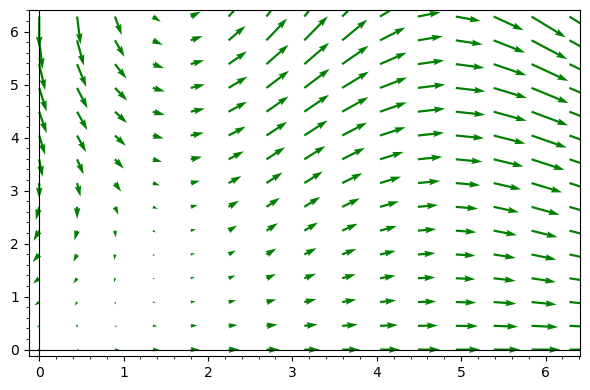

In [13]:
print( "Plot a vector field" )

var( "x" )
var( "y" )
 
A =  x - sin(y)
B = -y * cos(x)
        
field = (A,B)

density_vectors = 15  # higher numbers plot more vectors 

H = plot_vector_field( field, (x,0,2*pi), (y,0,2*pi), plot_points=density_vectors, color='green' )
show( H )

Plot Slope Field


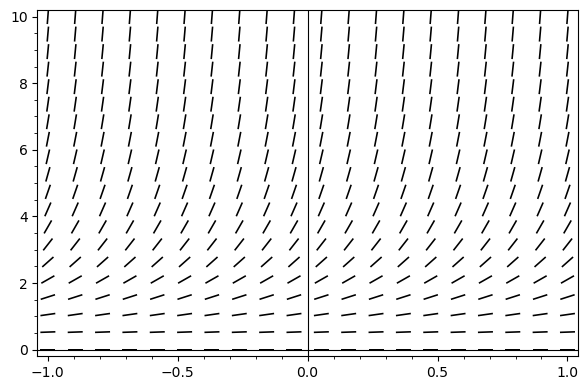

In [14]:
print( "Plot Slope Field" )

# make some variables
var( "x" )
var( "y" )    # this will be our function

# define the slope to be the value of the function
slope  =  y ^ 2

# make the plot in pt
pt  = plot_slope_field( slope, ( x, -1, 1 ), ( y, .001, 10 ) )  # plot_slope_field(f, (xvar, xmin, xmax), (yvar, ymin, ymax))

# note that someplace in the evaluation of this we get divide by zero errors - does not seem to hurt the graph

show( pt, aspect_ratio='automatic' )     # I like this the best aspect_ratio the best options are no option, =1 ='automatic'

 # List ( of data ) Plot  --> sage.plot.plot.list_plot()

returning data as a list of tuples


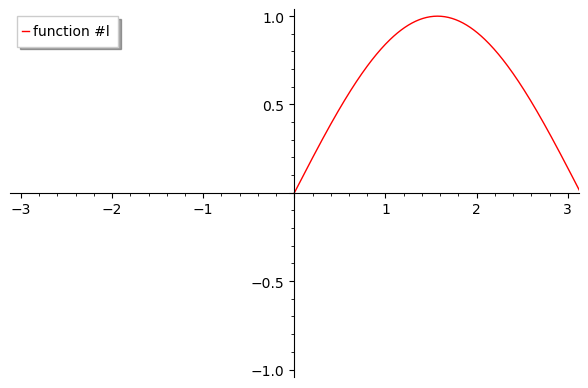

In [15]:
# line plot plotting a list of points as tuples 
# might be a way that data came in from an experiment or reading a file


plot_data  = make_sin_data( format = "tuple" )
#plot_data   = list( zip( sin_domain, sin_range ) )

# the next data is what a list of tuples might look like 
#plot_data    = [ ( 1.3, 2.7 ), ( 2.3, 2.7 ), ( 3.3, 2.9 )]
a_plot     = sage.plot.plot.list_plot( plot_data,
                                       plotjoined   = True,
                                       xmin          = -3.,
                                       xmax          = 3.,
                                       color         = "red",   
                                       linestyle     = "-",   
                                       #fill=False,     ilegal 
                                       thickness     = 1, 
                                       legend_label  = "function #l",  )                                    
                                     
                                     
                                     
                                     
                    
show( a_plot )

returning data as a 2 seperate lists


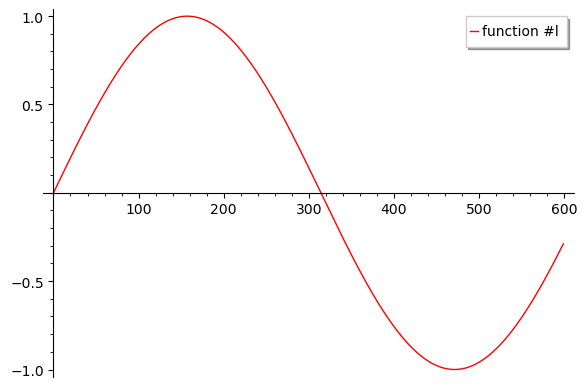

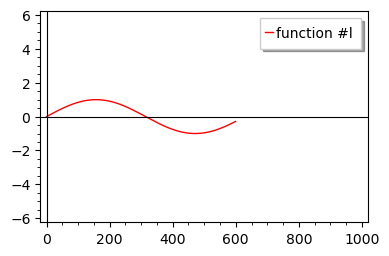

In [16]:
# here we just give a list of values, these are taken
# as y values and the x values are just the index for the list.
 
__, plot_data  = make_sin_data( format = "list" )    # plot data will just be the range, domain in __ thrown away
#plot_data   = list( zip( sin_domain, sin_range ) )

 
a_plot     = sage.plot.plot.list_plot( plot_data,
                                       plotjoined   = True,
                                     
                                       color         = "red",   
                                       linestyle     = "-",   
                                       #fill=False,     ilegal 
                                       thickness     = 1, 
                                       legend_label  = "function #l",  )                                    
                                     
                                     
# two versions of show                                      
                                     
                    
show( a_plot )  # defaults = automatic to some extent 

show( a_plot,  
     #aspect_ratio = 1,       # works, but 1 is not a good vaue for this plot 
     axes          = true, 
     frame         =True,  
     gridlines     = false, 
     figsize       = 4,        # bigger the number bigger the plot 4 is fairly small for a notebook 
     xmin          = -0, 
     xmax          = 1000,  
     ymin          = -6, 
     ymax          = 6 )





In [17]:
# additional info on list_plots
# if you have two lists one for x one for y they can be turned into a single list of points with
list_x   =  [ .1, .2, .3, .5]
list_y   =  [ .11, .4, .7, .9]

list_points_xy = list( zip( list_x, list_y ))
print( list_points_xy )
# this may be a format you want for list_plots


# and for more info on list_plot
help( list_plot )

[(0.100000000000000, 0.110000000000000), (0.200000000000000, 0.400000000000000), (0.300000000000000, 0.700000000000000), (0.500000000000000, 0.900000000000000)]
Help on function list_plot in module sage.plot.plot:

list_plot(data, plotjoined=False, **kwargs)
    ``list_plot`` takes either a list of numbers, a list of tuples, a numpy
    array, or a dictionary and plots the corresponding points.
    
    If given a list of numbers (that is, not a list of tuples or lists),
    ``list_plot`` forms a list of tuples ``(i, x_i)`` where ``i`` goes from
    0 to ``len(data)-1`` and ``x_i`` is the ``i``-th data value, and puts
    points at those tuple values.
    
    ``list_plot`` will plot a list of complex numbers in the obvious
    way; any numbers for which
    :func:`CC()<sage.rings.complex_field.ComplexField>` makes sense will
    work.
    
    ``list_plot`` also takes a list of tuples ``(x_i, y_i)`` where ``x_i``
    and ``y_i`` are the ``i``-th values representing the ``x``- and
    

 # Scatter (of points )Plot  --> scatter_plot()

Scatter plot 


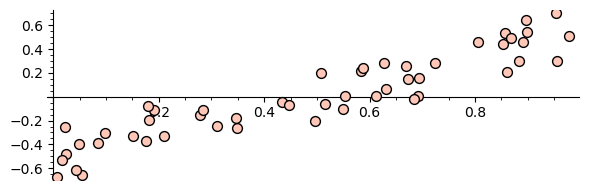

In [18]:
print( "Scatter plot "   )   #  ge

# python function 
def noisy_line(m, b, x):
    ret  = m * x + b + 0.5 * (random() - 0.5)
    return ret
    
slope     = 1.0
intercept = -0.5

x_coords = [random() for t in range(50)]
y_coords = [noisy_line(slope, intercept, x) for x in x_coords]




plot_data  = list( zip( x_coords, y_coords ) )

# all of above just to make some data a list of  ( x, y )




sp = scatter_plot( plot_data ) # plus optional arguments as above  

 

sp.show( figsize=[6,2] ) # plus optional arguments as above  

# Shapes of Geometric Objects

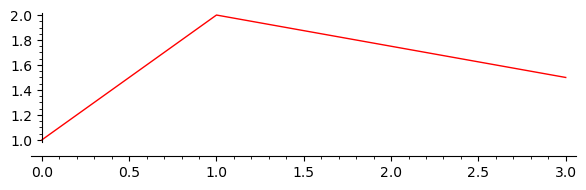

In [19]:
# very similar to line plot 
# https://doc.sagemath.org/html/en/reference/plotting/sage/plot/line.html Line Plots — 
# Sage 9.2 Reference Manual: 2D Graphics ]

# point on the line as a list of tuples
plot_data  = [(0.0,  1. ), (1.0, 2.), (3., 1.5 ) ]

line_plot         = line( plot_data, color='red')

line_plot.show( figsize=[6,2])


Plotting points as points


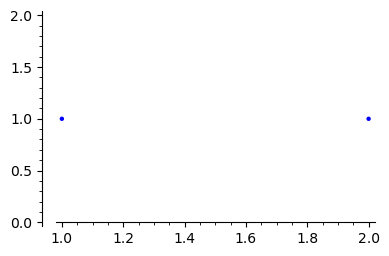

Plotting points as fancy points


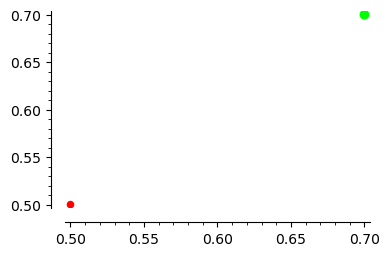

In [20]:
print( "Plotting points as points" )

points = point( [1, 1] ) + point( [2, 1] )
plot1  = plot( points )
show( plot1, figsize=4  )

print( "Plotting points as fancy points" )

fancy_points   = point((0.5, 0.5), rgbcolor=(1, 0, 0), size=30 )  
# add in more points
fancy_points   = fancy_points + point((0.7, 0.7), rgbcolor=(0, 1, 0), size=50) 

show( fancy_points , figsize = 4   )




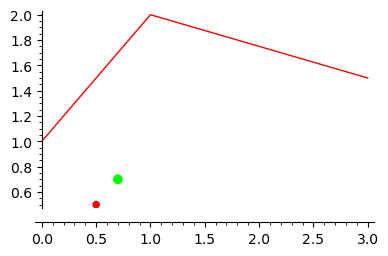

In [21]:
# you can still add different plots 
show( fancy_points + line_plot, figsize = 4   )

Line with point ( dot ) at end


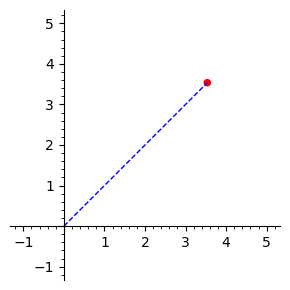

In [22]:
print( "Line with point ( dot ) at end" )
# computed in polar form 

r        =  5

t        = pi/4.
x        = r*cos( t )
y        = r*sin( t )
a_point   = point( ( x, y ), rgbcolor="red", size=30 )  
a_line    = line([(0.,0.), ( x, y ) ]  , rgbcolor="blue" , linestyle = "dashed"  )

plot_point_line  = a_point + a_line
show( plot_point_line,  xmin=-1.2, xmax=5.2,  ymin=-1.2, ymax=5.2 , figsize=[3,3] )

Plotting lines and points with Python function


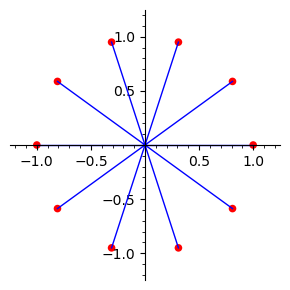

In [23]:
print( "Plotting lines and points with Python function" )

def  unit_rotator( theta ):
    x          = cos( theta  )
    y          = sin( theta  )   
    a_point     = point2d( ( x, y ), rgbcolor="red", size=30 )  #point2d?
    a_line      = line([(0.,0.), ( x, y ) ] )
    my_rotator  = a_point + a_line
    #print theta
    return my_rotator
    
    
    
graphic = point( (0, 0 ) ) 

for theta  in srange( .0, 2*pi, 2*pi/10):
     graphic = graphic + unit_rotator( theta )
        
        
     
show( graphic , xmin=-1.2, xmax=1.2,  ymin=-1.2, ymax=1.2 , figsize=[3,3] ) 

Plot an Arc


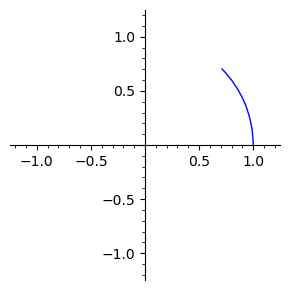

In [24]:
 print( "Plot an Arc" )

 
#show( arc((0,0), 1, sector=(pi/4,3*pi/4)) )

graphic   = ( arc((0,0), 1, sector=(0,  1*pi /4) ) ) 

show( graphic , xmin=-1.2, xmax=1.2,  ymin=-1.2, ymax=1.2, figsize=[3,3] )

Plot a Circle


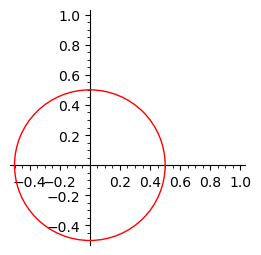

In [25]:
print( "Plot a Circle" )

anGraphic = circle((0,0), .5, rgbcolor=(1,0,0),  fill=False )    # fill controls filling of circle with color

show( anGraphic, aspect_ratio=1, figsize = 4 ,xmax = 1, ymax = 1)

Plot an Arrow


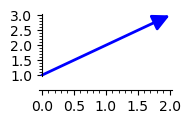

In [26]:
print( "Plot an Arrow" )


a_graphic = arrow((0,1), (2,3) ) # start cord, end cord as tuples

show( a_graphic,  figsize = 2  )

 

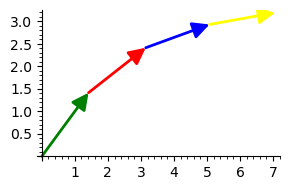

In [27]:
# phasor adding object made of arrors -- code works but need update 
# complicated as uses a class.

class PhasorSum( object ):
    
       def __init__(self, ):
          #assert size > 0
          self._noComponents = 0
          self._lastx = 0
          self._lasty = 0
          #self._sum   = 0 # really needs to be a graphic 
          
                   
       def getSum( self, ):
          return self._sum
          
       def addElement( self, aPhaysor,  aColor="blue" ):
                    
          tempx         = real( aPhaysor )
          tempy         = imag( aPhaysor )
          newx          = self._lastx + tempx
          newy          = self._lasty + tempy
          
          if ( self._noComponents == 0 ):
              self._sum     =             arrow( ( self._lastx, self._lasty ), ( newx, newy ), rgbcolor=aColor   ) 
          else:
              self._sum     = self._sum + arrow( ( self._lastx, self._lasty ), ( newx, newy ), rgbcolor=aColor   ) 
              
          self._noComponents += 1
          self._lastx   = newx      
          self._lasty   = newy 
          return 
           
    

sum1    = PhasorSum(  )

sum1.addElement( 2 * e ^ ( i * pi/4 ), "green" )
sum1.addElement( 2 * e ^ ( i * pi/6 ), "red" )
sum1.addElement( 2 * e ^ ( i * pi/12 ), "blue" )
sum1.addElement( 2 * e ^ ( i * pi/24 ), "yellow" )



show( sum1.getSum(), figsize = 3 )


Plot Text


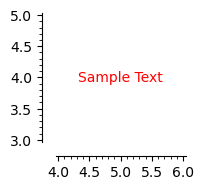

In [28]:
print( "Plot Text" )  

aGraphic     = text("Sample Text", (5,4), rgbcolor=(1,0,0))  # text is followed by tuple for position
show( aGraphic, aspect_ratio=1, figsize = 3 )

In [ ]:
import datetime
print( f"Ran last cell in Notebook => {datetime.datetime.now()}")